<h4><i>Импорт библиотек:</i></h4>

In [122]:
import time
import matplotlib.pyplot as plt
import random

<h3>Задание 1: Числа Трибоначчи</h3>

<h4><i>Код для вычисления чисел Трибоначчи рекурсией:</i></h4>

In [123]:
def tribonacci_number_recursive(n):
    if n == 1 or n == 2:
        return 0
    if n == 3:
        return 1
    return tribonacci_number_recursive(n - 1) + tribonacci_number_recursive(n - 2) + tribonacci_number_recursive(n - 3)

<h4><i>Код для вычисления чисел Трибоначчи с кэшированием:</i></h4>

In [124]:
tribonacci_numbers_cache = [0, 0, 1]
for i in range(3, 100):
    tribonacci_numbers_cache.append(tribonacci_numbers_cache[i - 1] + tribonacci_numbers_cache[i - 2] + tribonacci_numbers_cache[i - 3])


<h4><i>Код функции для вычисления времени работы алгоритма:</i></h4>

In [125]:
def calculate_time(function, numbers):
    times = []
    results = []
    for number in numbers:
        start_time = time.time()
        result = function(number)
        end_time = time.time()
        times.append(end_time - start_time)
        results.append(result)
    return results, times

<h4><i>Запросы для обоих алгоритмов:</i></h4>

In [126]:
queries = [5, 10, 15, 25]

<h4><i>Вычисление работы алгоритмов:</i></h4>

In [127]:
recursive_results, recursive_time = calculate_time(tribonacci_number_recursive, queries)
cache_results, cache_time = calculate_time(lambda n: tribonacci_numbers_cache[n - 1], queries)


<h4><i>Построение графика:</i></h4>

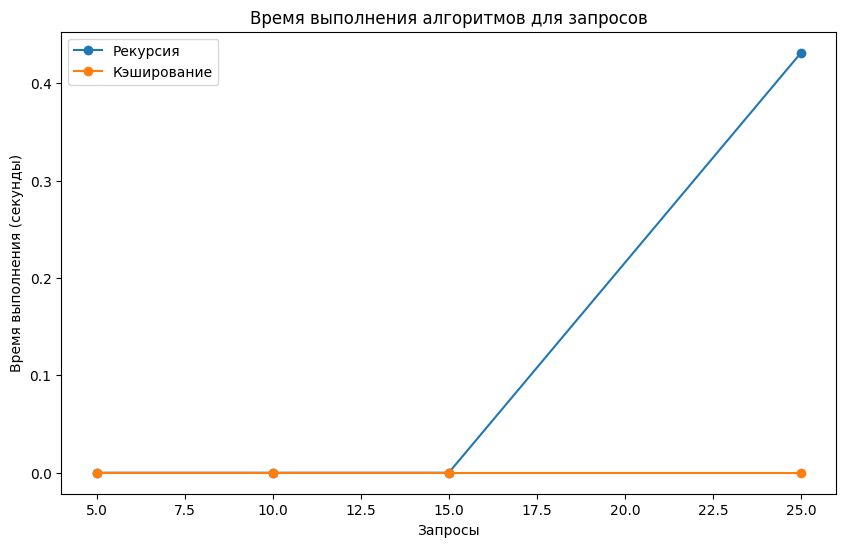

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(queries, recursive_time, label="Рекурсия", marker='o')
plt.plot(queries, cache_time, label="Кэширование", marker='o')
plt.xlabel("Запросы")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.title("Время выполнения алгоритмов для запросов")
plt.show()


Из графика видно, что запросы алгоритма, использующего кэширование, гораздо быстрее алгоритма, использующего рекурсию.

<h3>Задание 2: Максимальный по сумме элемент подмассива </h3>

<h4><i>Функция поиска максимального по сумме подмассива:</i></h4>

In [129]:
def maxSubArray(nums):
    arrayOfSums = [nums[0]]
    maxSum = nums[0]
    maxPosition = 0
    
    for i in range(1, len(nums)):
        if arrayOfSums[i - 1] > 0:
            arrayOfSums.append(arrayOfSums[i - 1] + nums[i])
        else:
            arrayOfSums.append(nums[i])
        
        if arrayOfSums[i] > maxSum:
            maxSum = arrayOfSums[i]
            maxPosition = i
    
    if maxSum < 0:
        return nums[maxPosition]
    
    endOfMaxSubarray = maxPosition
    startOfMaxSubarray = endOfMaxSubarray
    
    while startOfMaxSubarray >= 0 and arrayOfSums[startOfMaxSubarray] >= 0:
        startOfMaxSubarray -= 1

    return nums[startOfMaxSubarray + 1:endOfMaxSubarray + 1]
    


<h4><i>Создаем случайный массив из 10 элементов:</i></h4>

In [130]:
import numpy as np
np.random.seed(0)  
random_array = np.random.randint(-10, 10, 10)
random_array


array([  2,   5, -10,  -7,  -7,  -3,  -1,   9,   8,  -6])

<h4><i>Находим последовательность с максимальной суммой:</i></h4>

In [131]:
max_subarray = maxSubArray(random_array)
max_subarray

array([9, 8])

<h4><i>Функция сохранения всех сумм подмассивов:</i></h4>

In [132]:
def SubarraySums(nums):
    subarray_sums = []

    for i in range(len(nums)):
        current_sum = 0
        for j in range(i, len(nums)):
            current_sum += nums[j]
            if current_sum >= 0:
                subarray_sums.append(current_sum)
    
    return subarray_sums

subarray_sums=SubarraySums(random_array)
subarray_sums

[2, 7, 5, 6, 0, 5, 13, 7, 8, 16, 10, 9, 17, 11, 8, 2]

<h4><i>Построение гистограммы сумм элементов подмассивов с выделением максимальной суммы подмассива:</i></h4>

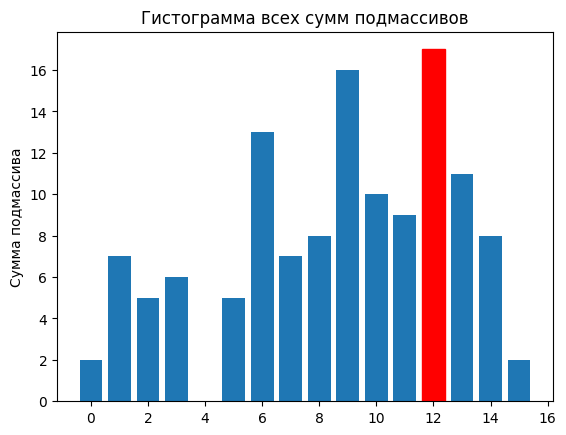

In [133]:
indices = np.arange(len(subarray_sums))
bars = plt.bar(indices, subarray_sums)
plt.ylabel('Сумма подмассива')
plt.title('Гистограмма всех сумм подмассивов')
#Выделяем максиальную сумму подмассива
for i in range(len(subarray_sums)):
    if subarray_sums[i] == max(subarray_sums):
        bars[i].set_color('red')

plt.show()

<h4><i>Построение гистограммы исходного массива с выделением подмассива с максимальной суммой:</i></h4>

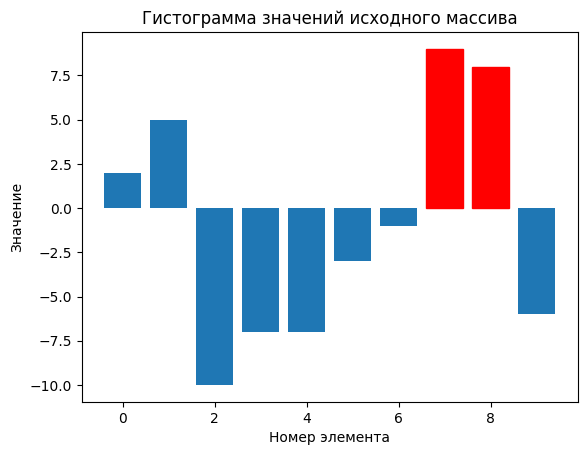

In [134]:
indices = np.arange(len(random_array))

bars = plt.bar(indices, random_array)
plt.xlabel('Номер элемента')
plt.ylabel('Значение')
plt.title('Гистограмма значений исходного массива')

#изменяем цвет элементов, которые входят в max_subarray
for i in range(len(random_array)):
    if random_array[i] in max_subarray:
        bars[i].set_color('red')

plt.show()